In [0]:
#from tensorflow.python.client import device_lib
#device_lib.list_local_devices()

In [0]:
#!wget https://github.com/mdtanvirhossain/plantRecognitionByLeaf/archive/master.zip

In [0]:
#!unzip master.zip

In [0]:
#ls

In [0]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics import  confusion_matrix

from __future__ import print_function

import keras
from keras import backend as K
from IPython.display import SVG
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.callbacks import ReduceLROnPlateau
from keras.utils.vis_utils import model_to_dot
from keras.utils.generic_utils import get_custom_objects
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Conv2D, Dense, Flatten, MaxPool2D
from keras.layers import Activation, Add, BatchNormalization, Dropout

Using TensorFlow backend.


In [0]:
model = Sequential()
 
model.add(Conv2D(activation ='relu', input_shape = (32,32,3), filters=32, kernel_size=(3, 3), padding="SAME", strides=(1, 1)))
 
model.add(Conv2D(activation ='relu',filters=32, kernel_size=(3, 3), padding="SAME", strides=(1,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
 
model.add(Conv2D(activation ='relu', filters=64, kernel_size=(3, 3), padding="SAME", strides=(1, 1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
 
# model.add(Dropout(0.25))

model.add(BatchNormalization())
 
model.add(Conv2D(activation ='relu',filters=128, kernel_size=(3, 3), padding="SAME", strides=(1,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
 

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 64)          256       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         73856     
__________

In [0]:
optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics=["accuracy"])

In [0]:
train_datagen = ImageDataGenerator(
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')


test_datagen = ImageDataGenerator(rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

In [0]:
train_generator = train_datagen.flow_from_directory(
                                                    'plantRecognitionByLeaf-master/dataset/dataset_original/train_data',
                                                    target_size=(32, 32),
                                                    batch_size=30,
                                                    color_mode='rgb',
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
                                                    'plantRecognitionByLeaf-master/dataset/dataset_original/test_data',
                                                    target_size=(32, 32),
                                                    batch_size=30,
                                                    color_mode='rgb',
                                                    class_mode='categorical')

Found 700 images belonging to 10 classes.
Found 300 images belonging to 10 classes.


In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.000001)


In [0]:
#from PIL import ImageFile
#ImageFile.LOAD_TRUNCATED_IMAGES = True

In [0]:
history = model.fit_generator(
                    train_generator,
                    steps_per_epoch=700 /30,
                    epochs=50,
                    validation_data=validation_generator,
                    validation_steps=50,
                    verbose=1,
                    callbacks=[learning_rate_reduction])

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
24/23 [==============================] - 350s 15s/step - loss: 2.4258 - acc: 0.1557 - val_loss: 1.9336 - val_acc: 0.2647
Epoch 2/50
24/23 [==============================] - 298s 12s/step - loss: 1.9252 - acc: 0.3081 - val_loss: 1.9327 - val_acc: 0.2980
Epoch 3/50
24/23 [==============================] - 299s 12s/step - loss: 1.6560 - acc: 0.4016 - val_loss: 1.6423 - val_acc: 0.4527
Epoch 4/50
24/23 [==============================] - 299s 12s/step - loss: 1.3572 - acc: 0.5305 - val_loss: 1.8619 - val_acc: 0.3293
Epoch 5/50
24/23 [==============================] - 299s 12s/step - loss: 1.0859 - acc: 0.6012 - val_loss: 3.2877 - val_acc: 0.2720
Epoch 6/50
24/23 [==============================] - 299s 12s/step - loss: 0.9420 - acc: 0.6513 - val_loss: 1.1251 - val_acc: 0.5933
Epoch 7/50
24/23 [==============================] - 301s 13s/step - loss: 0.8322 - acc: 0.6928 - val_loss: 2.1046 - val_acc: 0.4193
Epoch 8/50
24/23 [==========

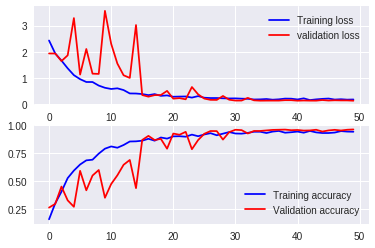

In [0]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [26]:
#Unnecessary

from keras.preprocessing import image

test = image.load_img('plantRecognitionByLeaf-master/dataset/dataset_original/test_data/AATA/aata_ (5).jpg',
                      target_size=(32, 32))
test = image.img_to_array(test)
test = np.expand_dims(test, axis=0)

print(model.predict(test))
print(train_generator.class_indices)

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
{'AATA': 0, 'Bott brikha': 1, 'Kath badam': 2, 'Kathal': 3, 'Kull': 4, 'Lebu': 5, 'Mango': 6, 'Mehguni': 7, 'Noyon tara': 8, 'Ronggan': 9}
